## Berechnung einer Kavität mit bewegter Wand (der Klassiker unter den Testfällen für CFD-Codes)

Wir lösen jetzt alle drei Differentialgleichungen, die wir zur Berechnung einer  instationären, zweidimensionalen, inkompressiblen Strömung benötigen.

Nochmal ins Gedächtnis gerufen lauten die Gleichungen:

Impulsgleichung:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$

$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

Druckgleichung (Poisson-Gleichung) als Ersatz für die Kontinuitätsgleichung:

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right) + \rho\frac{\partial}{\partial t}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y} \right)$$



### Diskretisierte Gleichungen

Die diskretisierten Gleichungen bekommen wir weitestgehend durch Zusammenkopieren der bisherigen Teilstücke. Neu ist die Ableitung des Druckes in den Impulsgleichungen, die wir mit einem Zentraldifferenzenverfahren diskretisieren und die Ableitungen der Geschwindigkeit auf der rechten Seite der Poisson-Gleichung, für die wir ebenfalls ein Zentraldifferenzenverfahren wählen.

Impulsgleichung in $x$-Richtung:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y}\\\ 
=-\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)$$

Impulsgleichung in $y$-Richtung:

$$\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y}\\\
=-\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}
+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)$$

Poisson-Gleichung:

$$ \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2*p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} 
=\rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)\right.$$

$$-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}
- \ 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}
-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
$$

Und wieder stellen wir die Gleichungen so um, dass wir jeweils ein explizites Zeitschrittverfahren erhalten (im Falle der Poisson-Gleichung ein Pseudo-Zeitschrittverfahren):

Impulsgleichung in $x$-Richtung:

$$
u_{i,j}^{n+1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(u_{i,j}^{n}-u_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(u_{i,j}^{n}-u_{i,j-1}^{n})$$
$$-\frac{\Delta t}{\rho 2\Delta x}(p_{i+1,j}^{n}-p_{i-1,j}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n})\right)
$$

Impulsgleichung in $y$-Richtung:

$$v_{i,j}^{n+1} = v_{i,j}^{n}-u_{i,j}^{n}\frac{\Delta t}{\Delta x}(v_{i,j}^{n}-v_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(v_{i,j}^{n}-v_{i,j-1}^{n})$$
$$
-\frac{\Delta t}{\rho 2\Delta y}(p_{i,j+1}^{n}-p_{i,j-1}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n})\right)$$

Poisson-Gleichung:

$$
p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2}{2(\Delta x^2+\Delta y^2)}-\frac{\rho\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)} \cdot$$

$$\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\right. $$

$$ -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]$$

### Anfangs- und Randbedingungen

Die Anfangsbedingungen sind $u=v=p=0$ überall im Strömungsgebiet.

Als Randbedingungen wählen wir

bewegte Wand an der Oberseite der Kavität:

$u(y=H) = 1$ $p(y=H) = 0$

untere Wand:

$u(y=0) = v(y=0) = 0$, $\frac{\partial p}{\partial y}\big |_{y=0} = 0$

linke Wand:

$u(x=0) = v(x=0) = 0$, $\frac{\partial p}{\partial x}\big |_{x=0} = 0$

rechte Wand:

$u(x=L) = v(x=L) = 0$, $\frac{\partial p}{\partial x}\big |_{x=L} = 0$

### Implementierung in Python

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import jit, int64, float64, void

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [30]:
nx = 200
ny = 200
dx = 100 / (nx - 1)
dy = 1 / (ny - 1)
x = np.linspace(0, 100, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = 1
CFL = 0.1
dt = CFL*dy/100
print (dt)

5.025125628140704e-06


Den langen Term auf der rechten Seite der Poisson-Gleichung fassen wir in einer Funktion zusammen, um nicht den Überblick zu verlieren:

In [31]:
@jit(nopython=True, cache=True, nogil=True)
def poisson_rhs(b, rho, dt, u, v, dx, dy):

    b[1:-1, 1:-1] = (rho * (1 / dt * 
                ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                 (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                  2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                       (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                      ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    return b

In einer weitere Funktion packen wir die Lösung der Poisson-Gleichung. Diese muss nach jedem Zeitschritt gelöst werden, um ein Druckfeld zu finden, das zur Erfüllung der Divergenzfreiheit führt:

In [32]:
@jit(void(float64[:,:], float64, float64, float64[:,:], int64), 
     nopython=True, cache=True, nogil=True)
def solve_poisson(p, dx, dy, b, nit):
    #pn = np.empty_like(p)
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = 0 #p[:, -2]  ##dp/dy = 0 at x = 2
        p[0, :] = p[1, :]    ##dp/dy = 0 at y = 0
        p[:, 0] =  p[:, 1]    ##dp/dx = 0 at x = 0
        p[-1, :] = p[-2, :]    ##dp/dy = 0 at y = 2
        #p[0,0] = 0.0
        
    #return p

Die Lösung der restlichen Gleichungen fassen wir ebenfalls in einer Funktion zusammen:

In [33]:
@jit(nopython=True, cache=True, nogil=True)
def cavity(nt, nit, u, v, dt, dx, dy, p, rho, nu):
    un = u.copy() #np.empty_like(u)
    vn = v.copy() #np.empty_like(v)
    b = np.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = poisson_rhs(b, rho, dt, u, v, dx, dy)
        solve_poisson(p, dx, dy, b, nit)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        u[0, :]  = 0
        u[:, 0]  = 100.  # Einströmrand --> vorgegebene Geschwindigkeit (Blockprofil)
        u[:, -1] = u[:,-2]   # Neumann-Randbedingung am Austritt
        u[-1, :] = 0    # Deckel der Kavität
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = v[:,-2]
        
        
    return u, v, p

Und schon sind wir fertig und können unsere Rechnung starten. Wir setzen die Anfangsbedingungen und berechnen zunächst 100 Zeitschritte (mit jeweils 50 sog *inneren Iterationen* für die Poisson-Gleichung):

In [34]:
u = np.ones((ny, nx)) * 100
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
nt = 5000
nit = 50
u, v, p = cavity(nt, nit, u, v, dt, dx, dy, p, rho, nu)

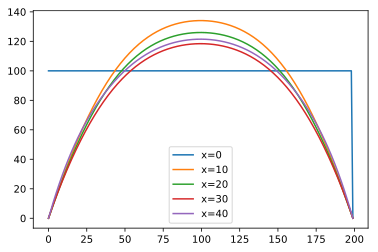

In [35]:
fig = plt.figure(figsize=(7,5))
# Druckfeld als Kontur
plt.contourf(X[::2, ::2], Y[::2, ::2], p[::2, ::2], alpha=0.5, cmap='plasma')  
plt.colorbar()
# Konturlinien des Druckfelds
#plt.contour(X, Y, p, cmap='plasma')  
# Vektorplot des Geschwindigkeitsfeldes
plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
plt.xlabel('X')
plt.ylabel('Y');
plt.show()

fig = plt.figure
plt.plot(u[:,0], label='x=0')
plt.plot(u[:,50], label='x=10')
plt.plot(u[:,100], label='x=20')
plt.plot(u[:,150], label='x=30')
plt.plot(u[:,199], label='x=40')
plt.legend()

und nochmal 1000 Zeitschritte weiter:

In [ ]:
nt = 10000
u, v, p = cavity(nt, nit, u, v, dt, dx, dy, p, rho, nu)

In [ ]:
fig = plt.figure(figsize=(7,5))
# Druckfeld als Kontur
plt.contourf(X, Y, p, alpha=0.5, cmap='plasma')  
plt.colorbar()
# Konturlinien des Druckfelds
plt.contour(X, Y, p, cmap='plasma')  
# Vektorplot des Geschwindigkeitsfeldes
plt.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3]) 
plt.xlabel('X')
plt.ylabel('Y');
plt.show()

fig = plt.figure
plt.plot(u[:,0])
plt.plot(u[:,20])
plt.plot(u[:,40])
plt.plot(u[:,60])
plt.plot(u[:,80])
plt.plot(u[:,100])
plt.plot(u[:,120])
plt.plot(u[:,140])



In [ ]:
fig = plt.figure(figsize=(7,5))

plt.streamplot(X, Y, u, v, density=2)
#, 
 #              linewidth=5*np.sqrt(u*u+v*v)/np.max(np.sqrt(u*u+v*v)), 
  #             color=np.sqrt(u*u+v*v)/np.max(np.sqrt(u*u+v*v)))
plt.xlabel('X')
plt.ylabel('Y');


---
Dieses Notebook folgt einer Idee von Lorena A. Barba und deren exzellenter Ausarbeitung in Python (["12 Steps to Navier Stokes"](http://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/)).

Der folgende Python-Code darf ignoriert werden. Er dient nur dazu, die richtige Formatvorlage für die Jupyter-Notebooks zu laden.

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open('TFDStyle.css', 'r').read()
    return HTML(styles)
css_styling()